In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
import warnings
warnings.filterwarnings('ignore')

In [12]:
com=pd.read_csv('Company_Data.csv')
com

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No
...,...,...,...,...,...,...,...,...,...,...,...
395,12.57,138,108,17,203,128,Good,33,14,Yes,Yes
396,6.14,139,23,3,37,120,Medium,55,11,No,Yes
397,7.41,162,26,12,368,159,Medium,40,18,Yes,Yes
398,5.94,100,79,7,284,95,Bad,50,12,Yes,Yes


In [13]:
# Checking for information of Data Frame
com.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Sales        400 non-null    float64
 1   CompPrice    400 non-null    int64  
 2   Income       400 non-null    int64  
 3   Advertising  400 non-null    int64  
 4   Population   400 non-null    int64  
 5   Price        400 non-null    int64  
 6   ShelveLoc    400 non-null    object 
 7   Age          400 non-null    int64  
 8   Education    400 non-null    int64  
 9   Urban        400 non-null    object 
 10  US           400 non-null    object 
dtypes: float64(1), int64(7), object(3)
memory usage: 34.5+ KB


In [14]:
# Checking for null values
com.isna().sum()

Sales          0
CompPrice      0
Income         0
Advertising    0
Population     0
Price          0
ShelveLoc      0
Age            0
Education      0
Urban          0
US             0
dtype: int64

In [17]:
# Checking the relation between Columns
com = com.apply(lambda x: pd.to_numeric(x, errors='coerce')).corr()


In [18]:
# Grouping by categorical coumns
com.groupby(['ShelveLoc','Urban','US']).count()

,,,Sales,CompPrice,Income,Advertising,Population,Price,Age,Education
ShelveLoc,Urban,US,,,,,,,,


In [19]:
# Label Encoding
label_encoder = preprocessing.LabelEncoder()
com['ShelveLoc']= label_encoder.fit_transform(com['ShelveLoc']) 
com['Urban']= label_encoder.fit_transform(com['Urban'])
com['US']= label_encoder.fit_transform(com['US'])

In [20]:
com.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
Sales,1.000000,0.064079,0.151951,0.269507,0.050471,-0.444951,0,-0.231815,-0.051955,0,0
CompPrice,0.064079,1.000000,-0.080653,-0.024199,-0.094707,0.584848,0,-0.100239,0.025197,0,0
Income,0.151951,-0.080653,1.000000,0.058995,-0.007877,-0.056698,0,-0.004670,-0.056855,0,0
Advertising,0.269507,-0.024199,0.058995,1.000000,0.265652,0.044537,0,-0.004557,-0.033594,0,0
Population,0.050471,-0.094707,-0.007877,0.265652,1.000000,-0.012144,0,-0.042663,-0.106378,0,0


### Visualization

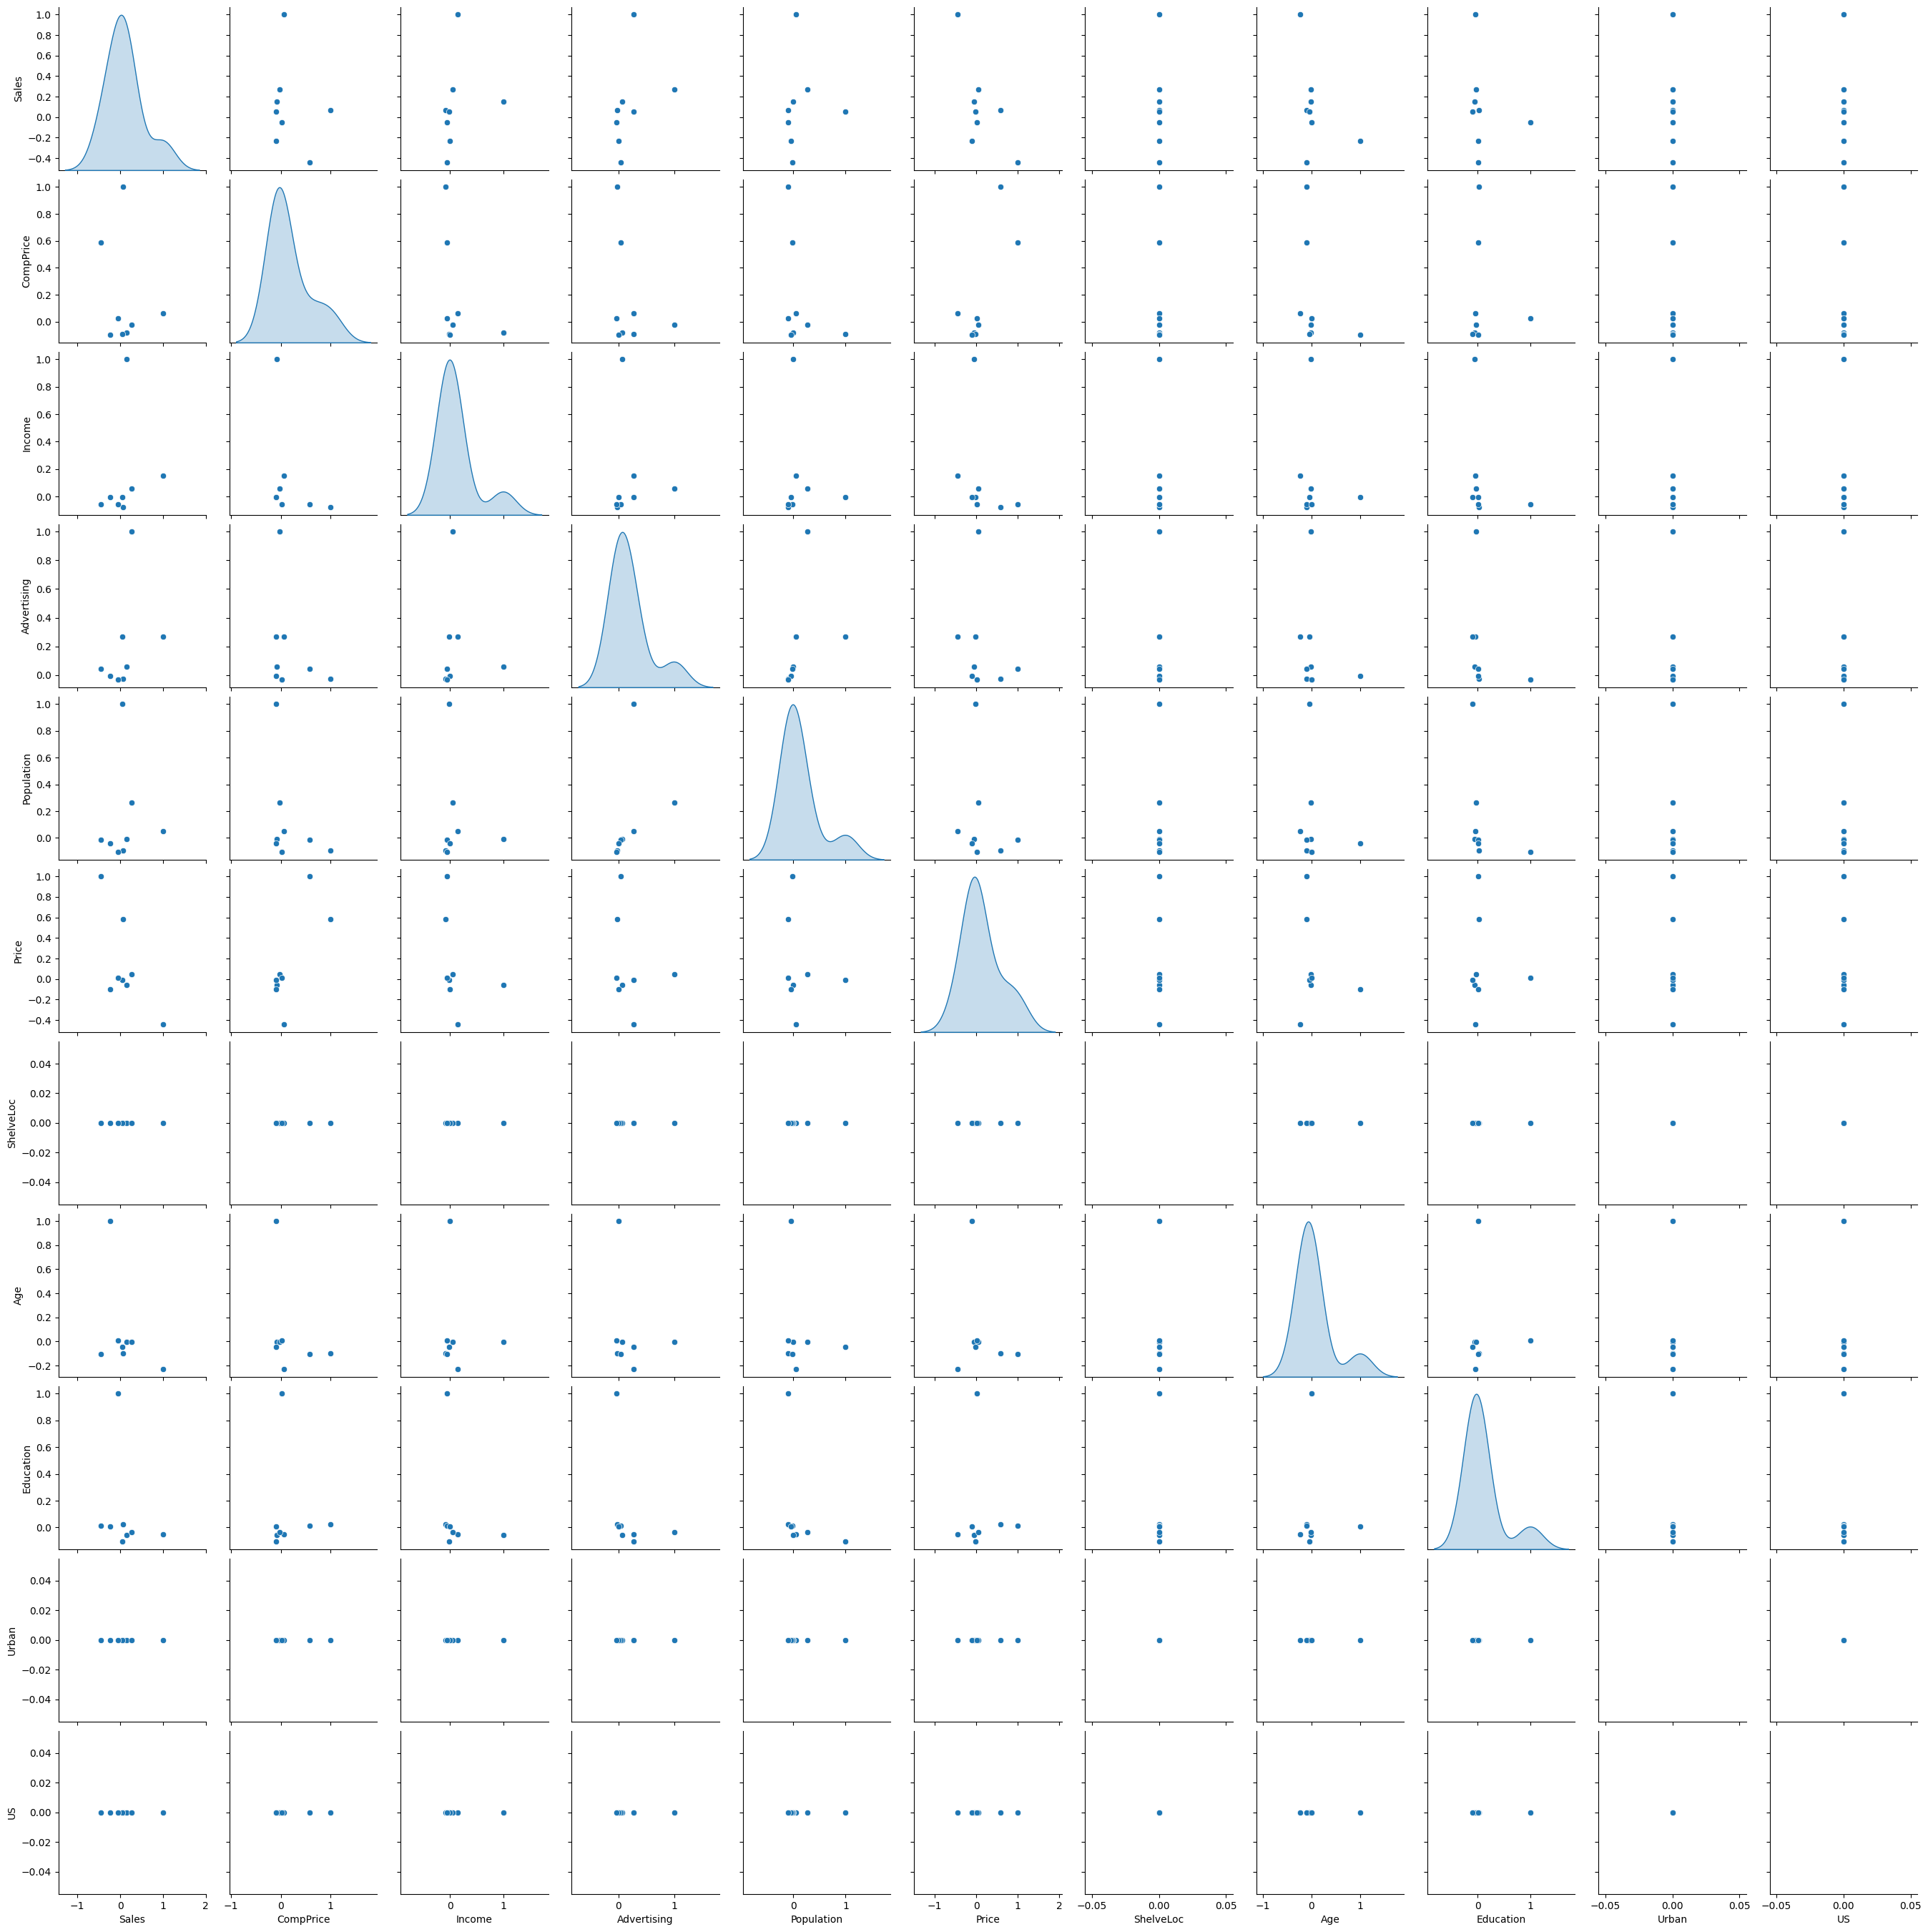

In [21]:
# Pair potting
sns.pairplot(com, diag_kind='kde')

<Axes: xlabel='Sales', ylabel='Income'>

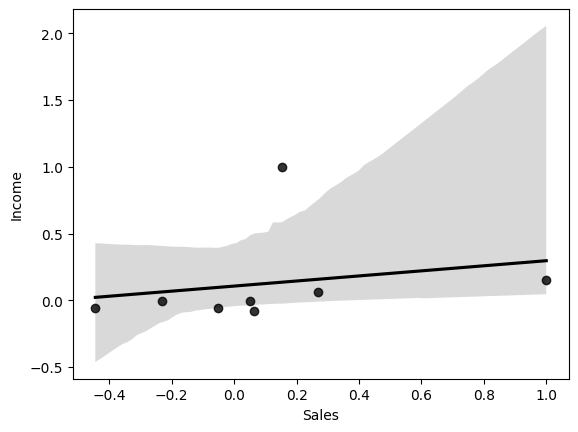

In [22]:
# Regression Plot
sns.regplot(x='Sales', y='Income', data=com, color='black')

<Axes: >

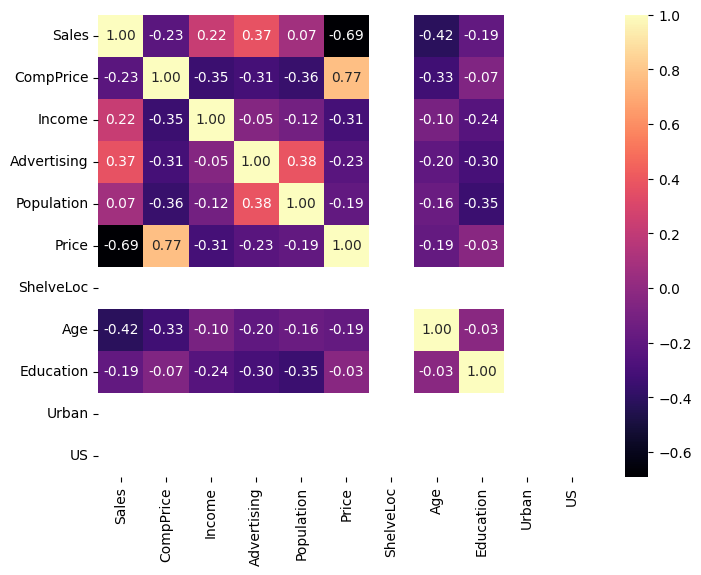

In [23]:
plt.figure(figsize = (8, 6));
sns.heatmap(com.corr(), cmap='magma', annot=True, fmt=".2f")

<Axes: xlabel='ShelveLoc'>

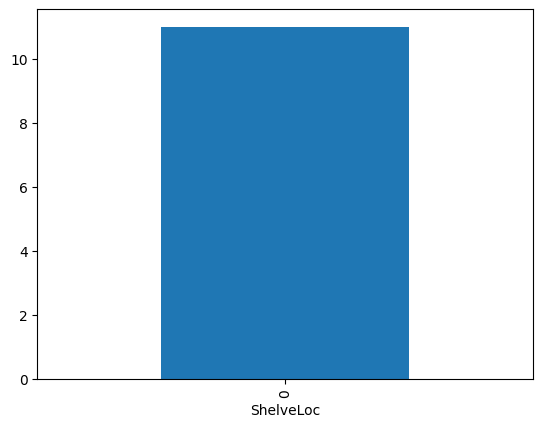

In [24]:
com.ShelveLoc.value_counts(ascending=True).plot(kind='bar')

In [25]:
x=com.drop(['Sales'], axis=1)
y=com[['Sales']]
x.head()

,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
Sales,0.064079,0.151951,0.269507,0.050471,-0.444951,0,-0.231815,-0.051955,0,0
CompPrice,1.000000,-0.080653,-0.024199,-0.094707,0.584848,0,-0.100239,0.025197,0,0
Income,-0.080653,1.000000,0.058995,-0.007877,-0.056698,0,-0.004670,-0.056855,0,0
Advertising,-0.024199,0.058995,1.000000,0.265652,0.044537,0,-0.004557,-0.033594,0,0
Population,-0.094707,-0.007877,0.265652,1.000000,-0.012144,0,-0.042663,-0.106378,0,0


In [26]:
y.tail()

,Sales
ShelveLoc,NaN
Age,-0.231815
Education,-0.051955
Urban,NaN
US,NaN


### Random Forest Regressor

In [27]:
num_trees = 70
max_features = 5

In [28]:
kfold = KFold(n_splits=7, random_state=34, shuffle=True)
model = RandomForestRegressor(n_estimators=num_trees, max_features=max_features)

In [34]:
clean_indices = ~np.isnan(x).any(axis=1)
x_clean = x[clean_indices]
y_clean = y[clean_indices]

# Perform cross-validation
results = cross_val_score(model, x_clean, y_clean, cv=kfold)
print("The accuracy is", results.mean())

The accuracy is nan
